In [2]:
import pandas as pd
import numpy as py
from scipy.cluster.vq import kmeans,vq
from pandas_datareader import data 


import datetime


import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv(r'F:\data_stocks.csv')

In [4]:
stock_feat=['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY','NASDAQ.AMD']
col_lst=['DATE']+stock_feat
df1=df[col_lst]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,NASDAQ.AMD
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975,14.61
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950,14.71
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100,14.64
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350,14.63
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000,14.67


In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
col_lst

['DATE',
 'NASDAQ.AAPL',
 'NASDAQ.ADP',
 'NASDAQ.CBOE',
 'NASDAQ.CSCO',
 'NASDAQ.EBAY',
 'NASDAQ.AMD']

In [7]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 7 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
NASDAQ.AMD     41266 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.2 MB


In [8]:
df1=df1.copy()
df1['DATE']=pd.to_datetime(df1['DATE'],unit='s')
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,NASDAQ.AMD
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,14.61
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,14.71
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,14.64
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,14.63
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,14.67


In [9]:
df1=df1.copy()
df1['Month']=df1['DATE'].dt.date
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,NASDAQ.AMD,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,14.61,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,14.71,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,14.64,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,14.63,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,14.67,2017-04-03


In [10]:
col_list=['Month']+stock_feat
df2=df1[col_lst]

In [11]:

df_AAPL_col_lst=['Month']+['NASDAQ.AAPL']
df_AAPL=df1[df_AAPL_col_lst]
df_AAPL.head()
list(df_AAPL.columns) 
                


['Month', 'NASDAQ.AAPL']

In [12]:
df_AAPL.set_index('Month', inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


In [13]:
df_CSCO_col_lst=['Month']+['NASDAQ.CSCO']
df_CSCO=df1[df_CSCO_col_lst]
df_CSCO.set_index('Month', inplace=True)
df_CSCO.head()



,NASDAQ.CSCO
Month,
2017-04-03,33.7400
2017-04-03,33.8800
2017-04-03,33.9000
2017-04-03,33.8499
2017-04-03,33.8400


In [14]:
df_EBAY_col_lst=['Month']+['NASDAQ.EBAY']
df_EBAY=df1[df_EBAY_col_lst]
df_EBAY.set_index('Month', inplace=True)
df_EBAY.head()


,NASDAQ.EBAY
Month,
2017-04-03,33.3975
2017-04-03,33.3950
2017-04-03,33.4100
2017-04-03,33.3350
2017-04-03,33.4000


In [15]:
df_CBOE_col_lst=['Month']+['NASDAQ.CBOE']
df_CBOE=df1[df_CBOE_col_lst]
df_CBOE.set_index('Month', inplace=True)
df_CBOE.head()


,NASDAQ.CBOE
Month,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12


In [16]:
df_AMD_col_lst=['Month']+['NASDAQ.AMD']
df_AMD=df1[df_AMD_col_lst]
df_AMD.set_index('Month', inplace=True)
df_AMD.head()


,NASDAQ.AMD
Month,
2017-04-03,14.61
2017-04-03,14.71
2017-04-03,14.64
2017-04-03,14.63
2017-04-03,14.67


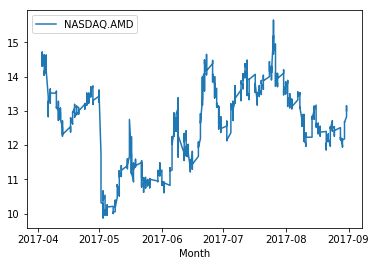

In [17]:

df_AMD.plot()
plt.show()

In [18]:
df_AAPL.loc[:,'Difference']=df_AAPL['NASDAQ.AAPL']-df_AAPL['NASDAQ.AAPL'].shift(1)


D:\anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [19]:
df_AAPL=df_AAPL.copy()
df_AAPL.dropna(inplace=True)
df_AAPL.head()

,NASDAQ.AAPL,Difference
Month,,
2017-04-03,143.7000,0.0200
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200
2017-04-03,143.7800,0.1200


<Figure size 792x576 with 0 Axes>

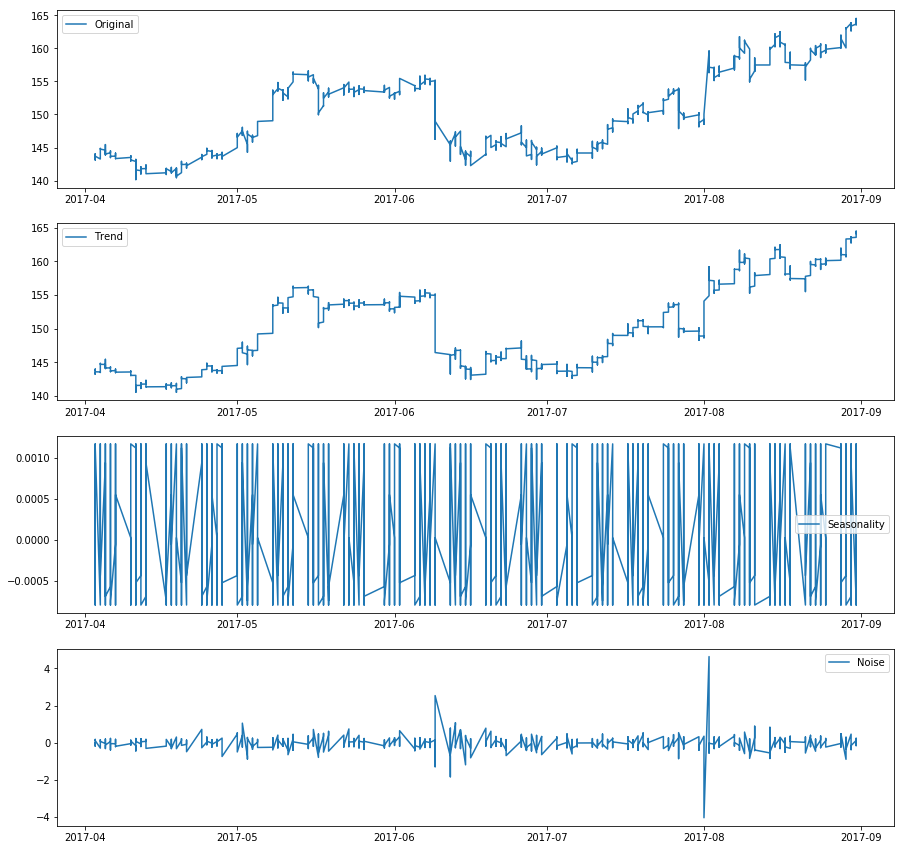

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],freq=12)
plt.figure(figsize=(11,8))
trend = decomposition.trend
seasonal = decomposition.seasonal
noise = decomposition.resid
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(noise, label='Noise')
plt.legend(loc='best')


In [21]:
ts_log_decompose=noise
ts_log_decompose.dropna(inplace=True)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1440x576 with 0 Axes>

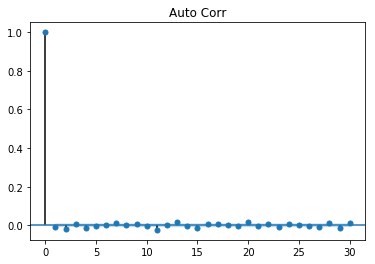

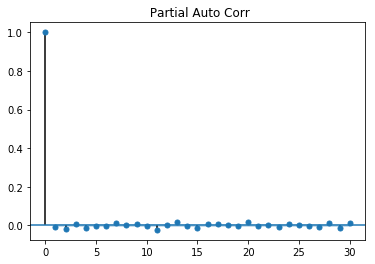

In [23]:
plt.figure(figsize=(20,8))
fig_first=plot_acf(df_AAPL['Difference'],lags=30,title='Auto Corr')
fig_pacf_first=plot_pacf(df_AAPL['Difference'],lags=30,title=' Partial Auto Corr')

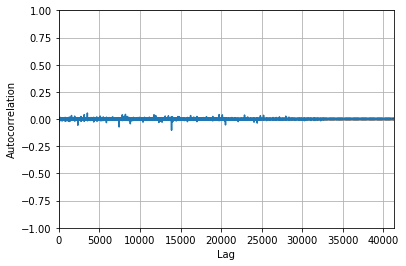

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['Difference'])

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [26]:
model=sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),season_order=(0,1,0,12))
res=model.fit()
print(res.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                           Statespace Model Results                           
Dep. Variable:            NASDAQ.AAPL   No. Observations:                41265
Model:               SARIMAX(0, 1, 0)   Log Likelihood               39214.866
Date:                Thu, 21 May 2020   AIC                         -78427.732
Time:                        21:43:54   BIC                         -78419.104
Sample:                             0   HQIC                        -78425.005
                              - 41265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0088   1.68e-06   5201.585      0.000       0.009       0.009
Ljung-Box (Q):                      134.69   Jarque-Bera (JB):       11808644937.36
Prob(Q):                              0.00   Pr

In [27]:
df_AAPL=df_AAPL.copy()
df_AAPL['Forecast']=res.predict()
df_AAPL.head()

,NASDAQ.AAPL,Difference,Forecast
Month,,,
2017-04-03,143.7000,0.0200,0.0000
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600


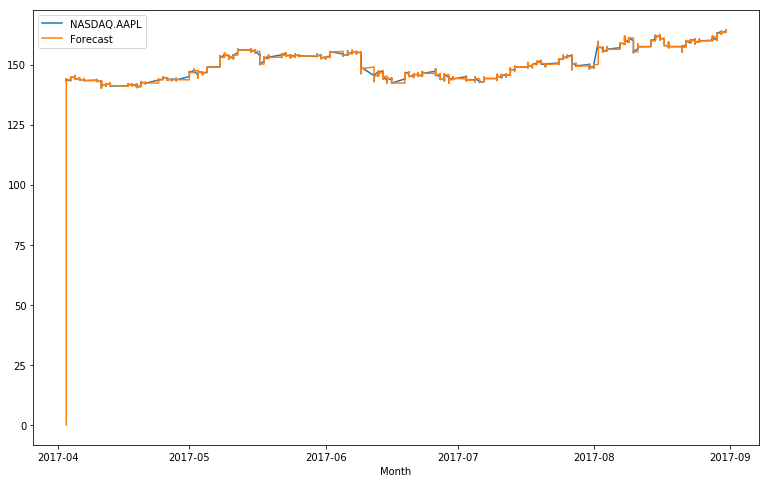

In [28]:
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(13,8))

In [29]:
res.forecast(steps=10)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    163.98
41266    163.98
41267    163.98
41268    163.98
41269    163.98
41270    163.98
41271    163.98
41272    163.98
41273    163.98
41274    163.98
dtype: float64

In [30]:
res.predict(start=41264,end=41274)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    163.88
41265    163.98
41266    163.98
41267    163.98
41268    163.98
41269    163.98
41270    163.98
41271    163.98
41272    163.98
41273    163.98
41274    163.98
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast'])

0.5091676129499567


0.05176397915907527